In [1]:
import cv2
import skvideo.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

/home/adit.biswas/anaconda3/lib/python3.6/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [ ]:
species_list = ['species_fourspot',
 'species_grey sole',
 'species_other',
 'species_plaice',
 'species_summer',
 'species_windowpane',
 'species_winter']

In [16]:
def process_row(row, display=False, bounding_pad=5):
    x1, x2, y1, y2 = map(int, row[['x1', 'x2', 'y1', 'y2']].as_matrix())
    image = vid[row['frame']]
    if x1 > x2:
        box_x1 = x2 - bounding_pad
        box_x2 = x1 + bounding_pad
        if y1 > y2:
            box_y1 = y2 - bounding_pad
            box_y2 = y1 + bounding_pad
            corner="top_left"
            point_a = (bounding_pad, bounding_pad)
            point_b = (box_x2 -box_x1 - bounding_pad, box_y2-box_y1 - bounding_pad)
        else:
            box_y1 = y2 + bounding_pad
            box_y2 = y1 - bounding_pad
            corner="botton_left"
            point_a = (bounding_pad, box_y2-box_y1 - bounding_pad)
            point_b = (box_x2 -box_x1 - bounding_pad, bounding_pad)
    else:
        box_x1 = x1 - bounding_pad
        box_x2 = x2 + bounding_pad
        if y1 > y2:
            box_y1 = y1 + bounding_pad
            box_y2 = y2 - bounding_pad
            corner="bottom_right"
            point_a = (box_x2 -box_x1 - bounding_pad, box_y2-box_y1 - bounding_pad)
            point_b = (bounding_pad, bounding_pad)
        else:
            box_y1 = y1 - bounding_pad
            box_y2 = y2 + bounding_pad
            corner="top_right"
            point_a = (box_x2 -box_x1 - bounding_pad, bounding_pad)
            point_b = (bounding_pad, box_y2-box_y1 - bounding_pad)
    image = np.copy(image)
    cropped_image = np.copy(image)[box_y1:box_y2,box_x1:box_x2]
    
    if display:
        image =cv2.rectangle(image, (x1,y1), (x2, y2), (255, 0, 0), 3)
        print(cropped_image.shape)
        cv2.circle(cropped_image, point_a, 1, (255,0,0), 2)
        cv2.circle(cropped_image, point_b, 1, (255,0,0), 2)
        figure = plt.figure(figsize = (10,6))
        a = figure.add_subplot(2,2,1)
        plt.imshow(image)
        plt.axis('off')
        a = figure.add_subplot(2,2,2)
        plt.imshow(cropped_image)
        plt.show()

In [ ]:
def process_video(df, video_index, display_frames=True):
    videos = df['video_id'].unique()
    base_path = '../data/train_videos/'
    x = df[df['video_id']==videos[video_index]].dropna()
    x['species'] = x.apply(lambda row: row[species_list].argmax(), axis=1)
    max_frame = x['frame'].max()
    vid = skvideo.io.vread(base_path + videos[video_index] + '.mp4', num_frames=(max_frame+1))
    for i, row in x.iterrows():
        process_row(row, display_frames=True, bounding_pad=20)

In [2]:
df = pd.read_csv('../data/training.csv')

In [3]:
videos = df['video_id'].unique()

In [11]:
vid_index = 0

In [12]:
x = df[df['video_id']==videos[vid_index]].dropna()
x['species'] = x.apply(lambda row: row[species_list].argmax(), axis=1)

In [13]:
max_frame = x['frame'].max()

In [14]:
base_path = '../data/train_videos/'

In [15]:
vid = skvideo.io.vread(base_path + videos[vid_index] + '.mp4', num_frames=(max_frame+1))

(166, 147, 3)


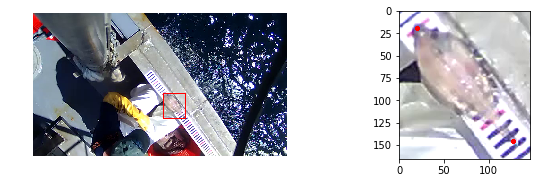

(174, 155, 3)


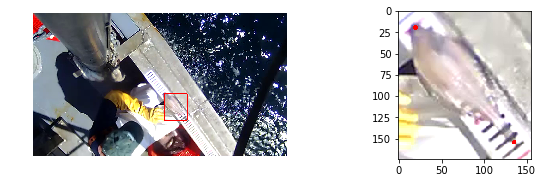

(176, 146, 3)


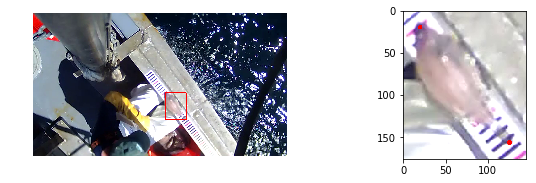

(171, 143, 3)


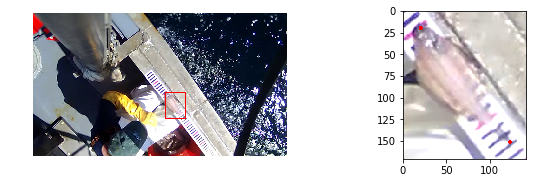

(179, 151, 3)


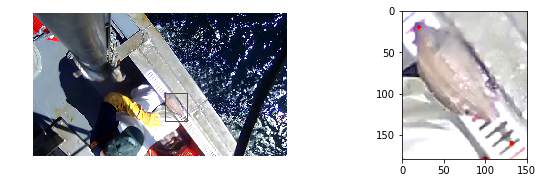

(160, 148, 3)


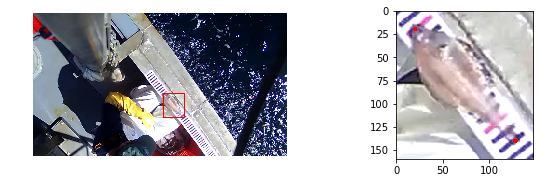

(179, 157, 3)


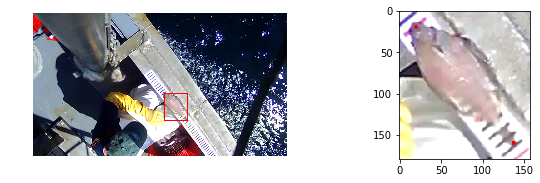

(202, 168, 3)


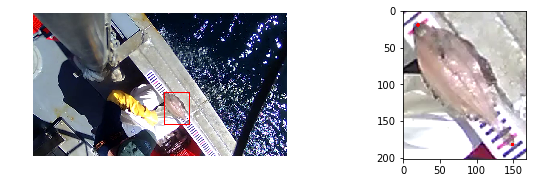

(194, 163, 3)


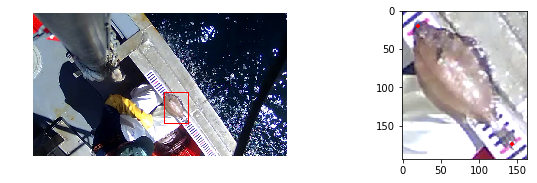

(174, 146, 3)


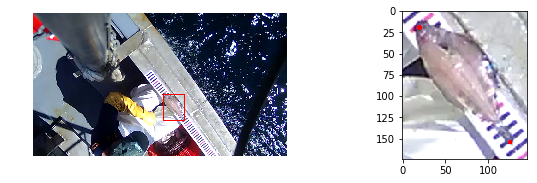

(145, 137, 3)


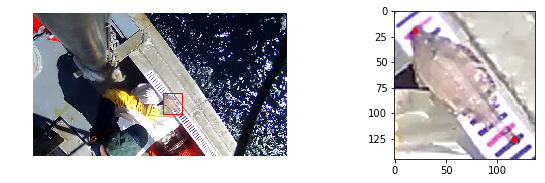

(195, 166, 3)


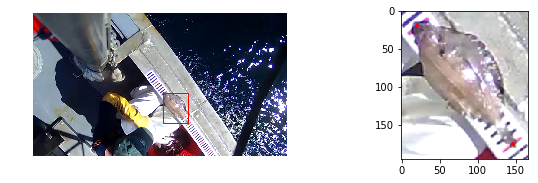

(191, 167, 3)


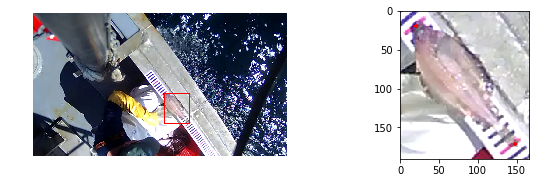

(205, 163, 3)


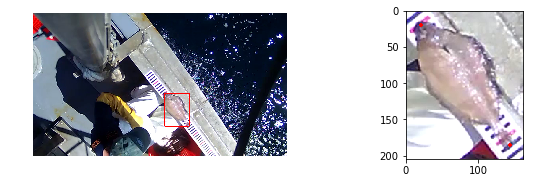

(177, 140, 3)


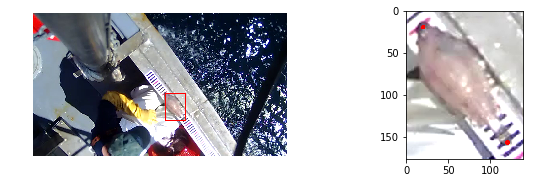

(168, 151, 3)


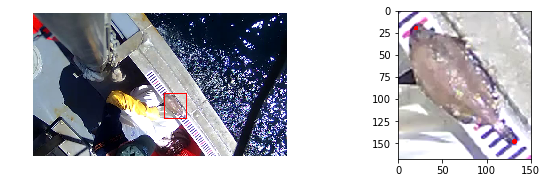

(168, 129, 3)


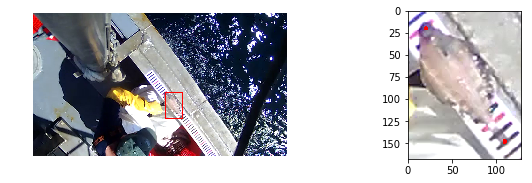

(180, 149, 3)


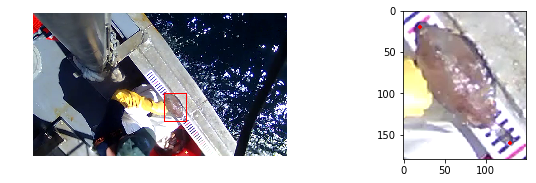

(179, 151, 3)


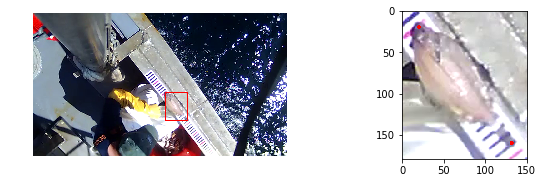

(149, 151, 3)


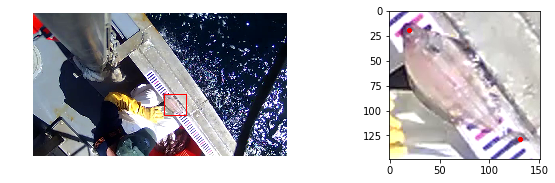

(177, 152, 3)


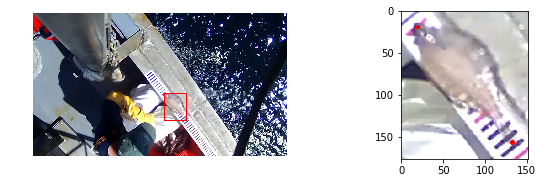

(118, 101, 3)


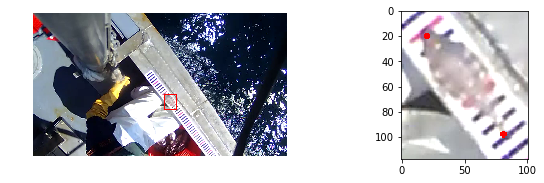

(165, 153, 3)


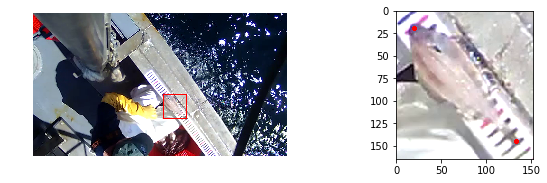

(95, 87, 3)


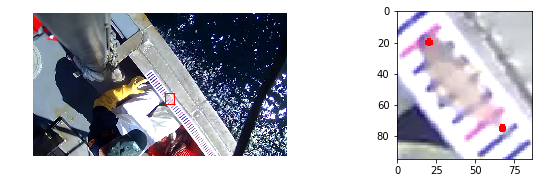

(164, 151, 3)


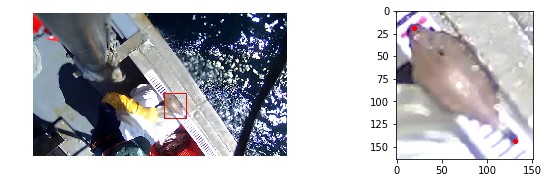

In [17]:
for i, row in x.iterrows():
    #print(row[['x1', 'x2', 'y1', 'y2']].as_matrix())
    process_row(row, display=True, bounding_pad=20)
    